In [1]:
!pip install yfinance

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
msft = yf.Ticker("GOOGL")

# get historical market data
hist = msft.history(period="max")

In [23]:
df = pd.DataFrame(hist)
# Load the data
df['Date'] = pd.to_datetime(df.index)  # Ensure 'Date' is datetime
df.set_index('Date', inplace=True)     # Set 'Date' as the index
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.493464,2.594698,2.392727,2.501941,893181924,0.0,0.0
2004-08-20 00:00:00-04:00,2.518648,2.719870,2.505931,2.700670,456686856,0.0,0.0
2004-08-23 00:00:00-04:00,2.761511,2.829582,2.719122,2.727849,365122512,0.0,0.0
2004-08-24 00:00:00-04:00,2.773729,2.782705,2.582480,2.614895,304946748,0.0,0.0
2004-08-25 00:00:00-04:00,2.617140,2.692941,2.590210,2.643072,183772044,0.0,0.0


# 1. Moving Averages

In [11]:
# 1. Moving Averages
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()

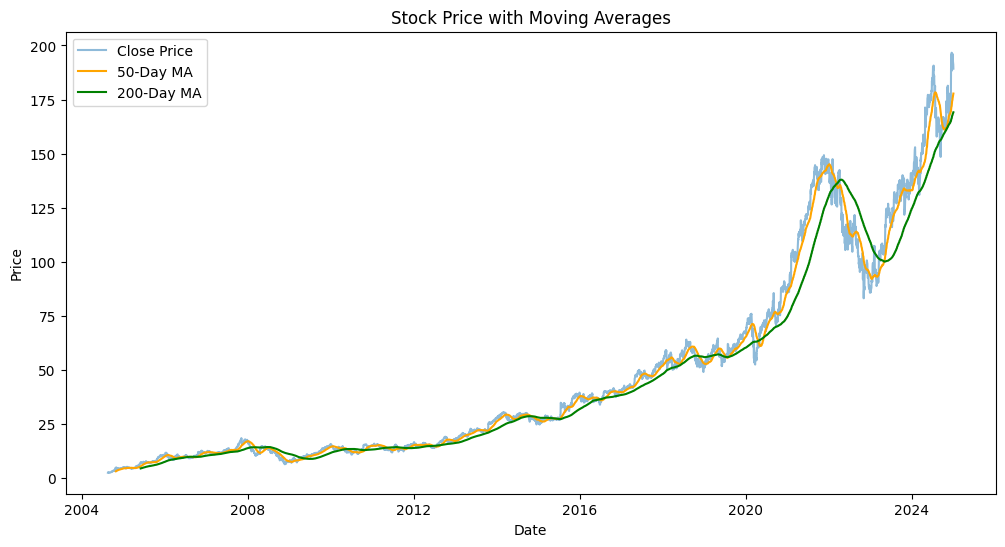

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['50_MA'], label='50-Day MA', color='orange')
plt.plot(df['200_MA'], label='200-Day MA', color='green')
plt.legend()
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# 2. Daily Returns

In [13]:
# 2. Daily Returns
df['Daily_Return'] = df['Close'].pct_change() * 100

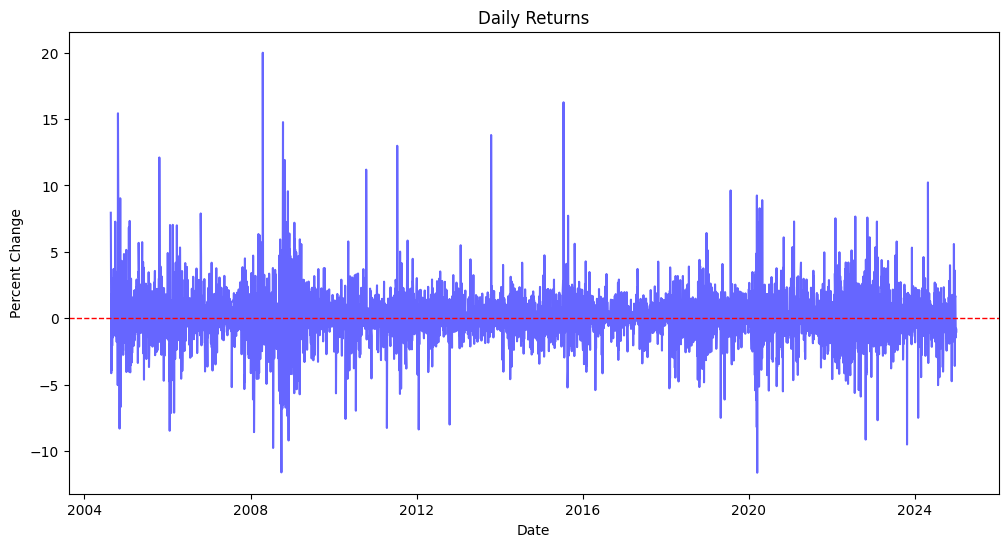

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['Daily_Return'], label='Daily Return', color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.show()

# 3. Rolling Volatility


In [15]:
# 3. Rolling Volatility
df['Rolling_Std'] = df['Daily_Return'].rolling(window=20).std()

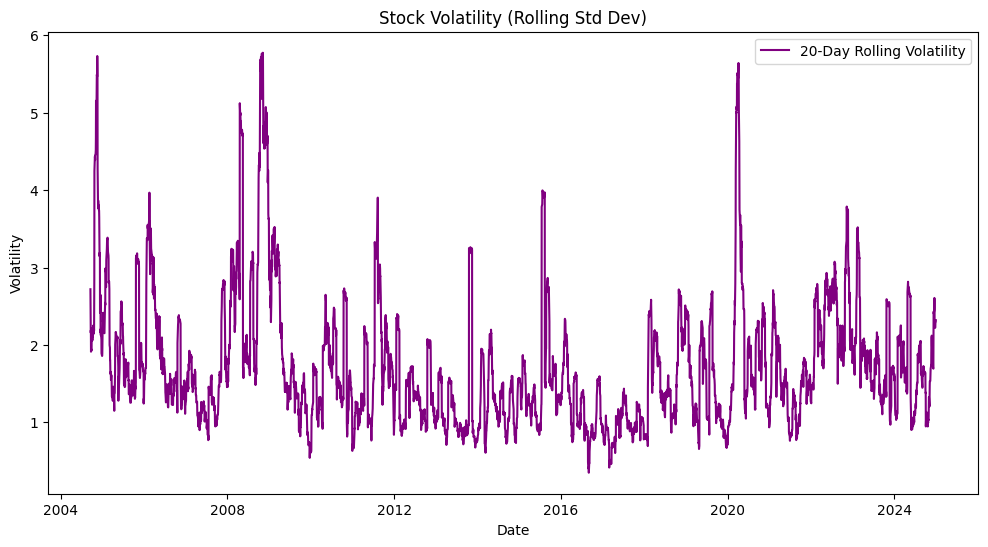

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Rolling_Std'], label='20-Day Rolling Volatility', color='purple')
plt.title('Stock Volatility (Rolling Std Dev)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# 4. Volume Analysis


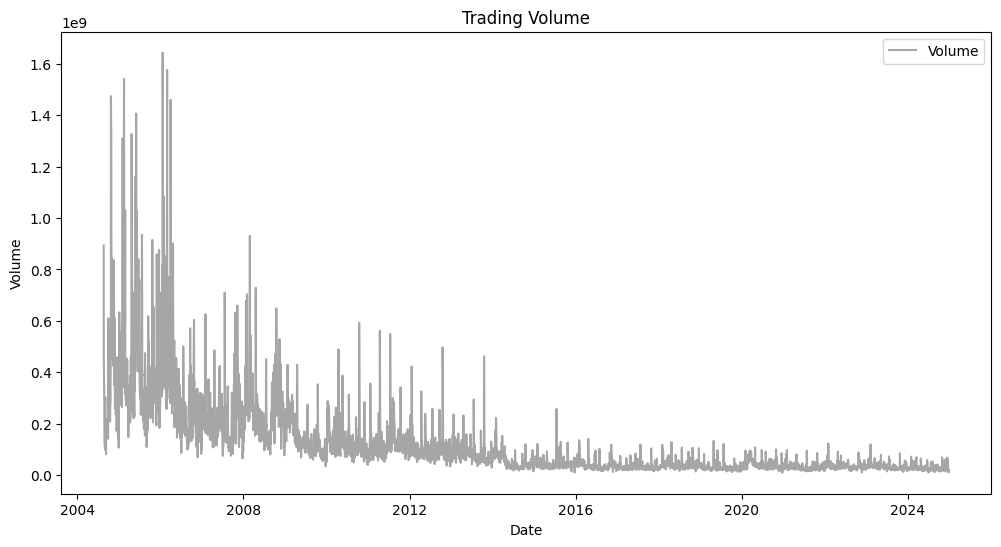

In [17]:
# 4. Volume Analysis
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label='Volume', color='grey', alpha=0.7)
plt.title('Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# 5. Support and Resistance Levels

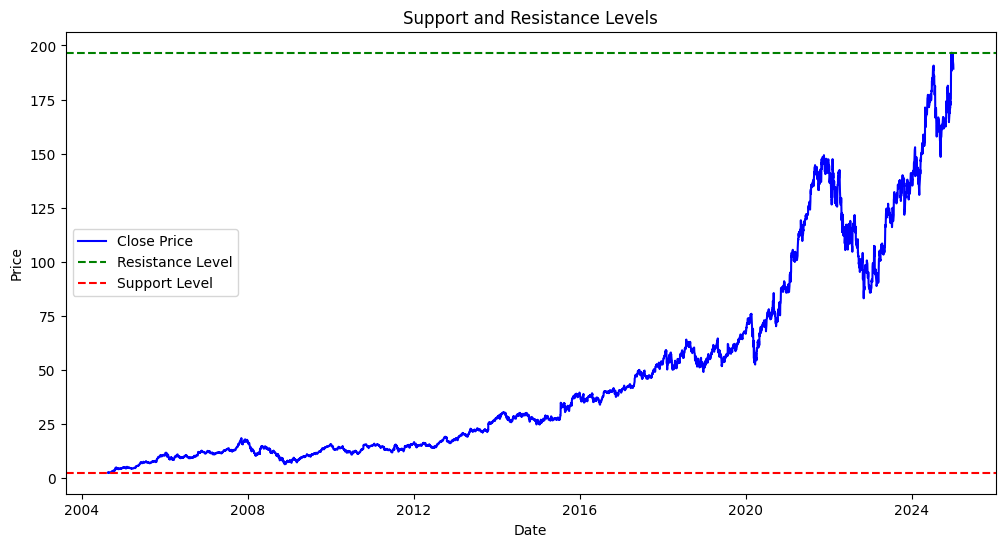

In [18]:
# 5. Support and Resistance Levels
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.axhline(df['Close'].max(), color='green', linestyle='--', label='Resistance Level')
plt.axhline(df['Close'].min(), color='red', linestyle='--', label='Support Level')
plt.title('Support and Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 6. Predictive Modeling (Linear Regression)

In [22]:
# 6. Predictive Modeling (Linear Regression)
df['Day'] = np.arange(len(df))  # Numerical day count
X = df[['Day']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

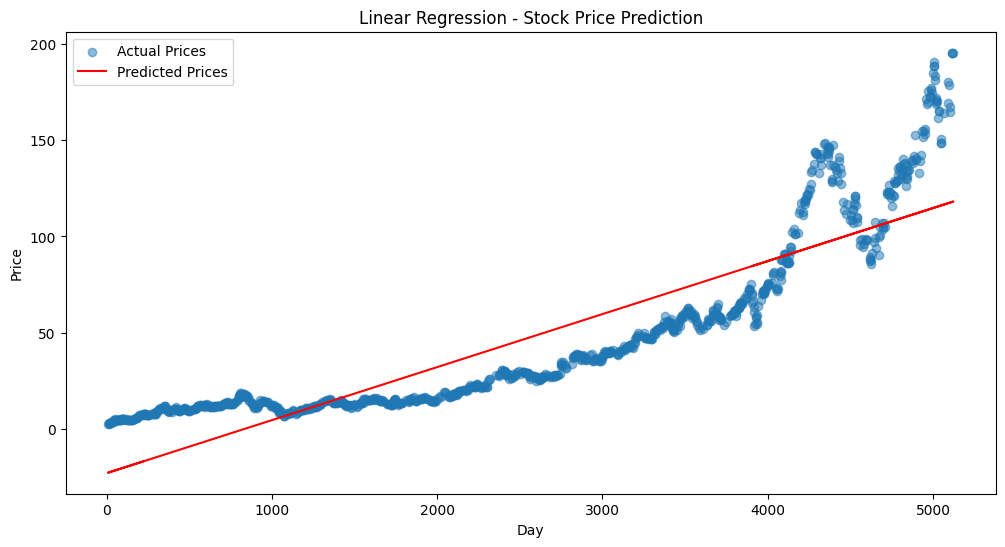

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label='Actual Prices', alpha=0.5)
plt.plot(X_test, y_pred, label='Predicted Prices', color='red')
plt.title('Linear Regression - Stock Price Prediction')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

# 6. Correlation Analysis (Comparing with GOOG)

In [25]:
# 6. Correlation Analysis (Comparing with GOOG)
msft = yf.Ticker("GOOG")

# get historical market data
hist = msft.history(period="max")

In [27]:
df_correlation = df['Close'].corr(df['Close'])
print(f"Correlation with index: {df_correlation}")

Correlation with index: 0.9999999999999999
